## Import package

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

## Data loading:

In [2]:
data_df = pd.read_csv("Data_set.csv")
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
data_df.shape

(7043, 21)

## Data types:

In [3]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data_df.SeniorCitizen = data_df.SeniorCitizen.astype("str")
data_df.TotalCharges = data_df.TotalCharges.replace(" ",0)
data_df.TotalCharges = data_df.TotalCharges.astype("float")

In [5]:
categorical = []
numerical = []
for idx,dtypes in enumerate(data_df.dtypes):
    if dtypes == "object":
        categorical.append(data_df.columns[idx])
    else:
        numerical.append(data_df.columns[idx])

In [6]:
## the data types :
print(f"The categorical data is {categorical}")
print(f"The numerical data is {numerical}")

The categorical data is ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
The numerical data is ['tenure', 'MonthlyCharges', 'TotalCharges']


## Exploratory data analysis :

In [7]:
def qqplot(x,y,x_label,y_label):
    N = len(x)
    M = len(y)
    quantiles_x = (np.arange(1, N + 1) - 0.5) / N
    quantiles_y = (np.arange(1, M + 1) - 0.5) / M

    # Interpolate y-values for quantiles that match x-values
    interpolated_y  = np.interp(quantiles_x, quantiles_y, y)

    q1 = interpolated_y[N//4]
    q2 = interpolated_y[N//2]
    q3 = interpolated_y[3*N//4+1]


    plt.scatter(x, interpolated_y, color='blue', label='Q-Q Plot')
    
    # Percentile plotting:
    plt.scatter(x[N//4],q1,color="red",s=100)
    plt.text(x[N//4],q1,"Q1")
    plt.scatter(x[N//2],q2,color="red",s=100)
    plt.text(x[N//2],q2,"Q2")
    plt.scatter(x[3*N//4+1],q3,color="red",s=100)
    plt.text(x[3*N//4],q3,"Q3")


    plt.plot([min(x), max(x)], [min(x), max(x)], color='red', linestyle=':', label='45-degree Line',ms = 100)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Quantile-Quantile Plot')
    plt.legend()
    
    #print((N//4)/N,(N//2)/N,(3*N//4+1)/N)

---
**SeniorCitizen**

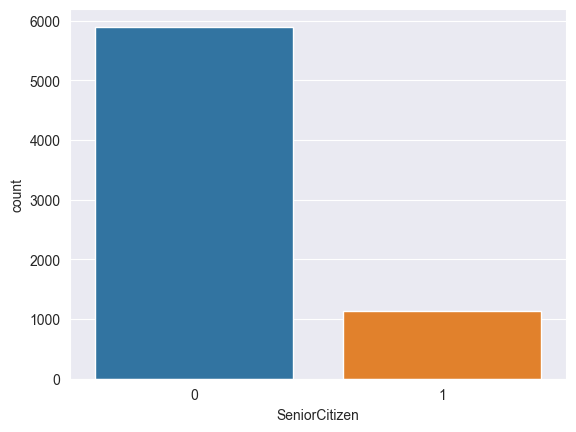

The count of Senior and Non-Senior citizen is --


,customerID
SeniorCitizen,
0,5901
1,1142


In [8]:
sns.countplot(data=data_df,x="SeniorCitizen")
plt.show()

print(f"The count of Senior and Non-Senior citizen is --")
data_df.groupby("SeniorCitizen")[["customerID"]].count()

In [9]:
pivot_table = data_df.pivot(index="customerID",columns="SeniorCitizen",values="MonthlyCharges")
pivot_table.columns = ["Non_Senior","Senior"]
senior_df = pivot_table[['Senior']].dropna().sort_values(by="Senior")
Non_Senior_df = pivot_table[['Non_Senior']].dropna().sort_values(by="Non_Senior")

Text(0.5, 1.0, 'Box-plot')

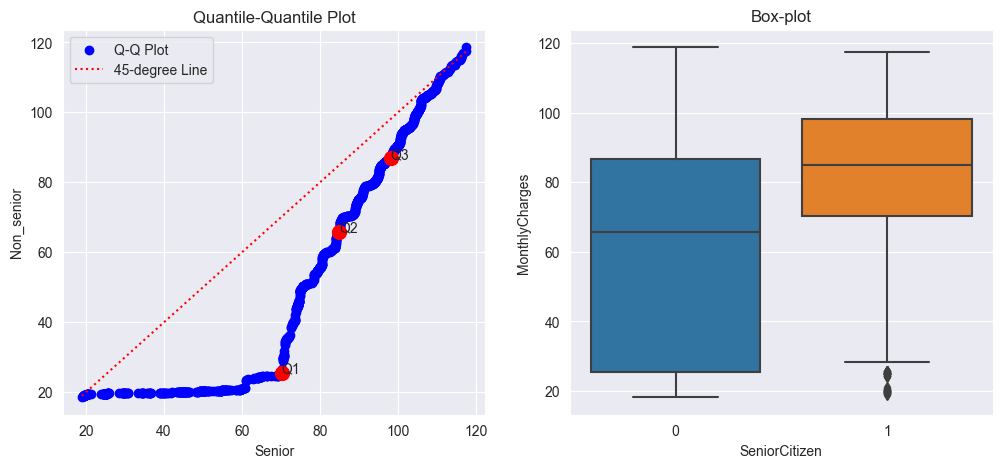

In [10]:
x = senior_df.Senior.values.flatten()
y = Non_Senior_df.Non_Senior.values.flatten()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Senior","Non_senior")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="SeniorCitizen",y="MonthlyCharges")
p.set_title("Box-plot")

<Axes: xlabel='SeniorCitizen', ylabel='count'>

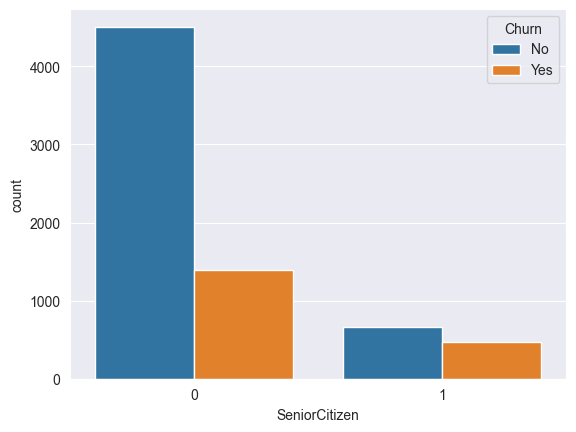

In [11]:
sns.countplot(data=data_df,x="SeniorCitizen",hue="Churn")

---
**Gender**

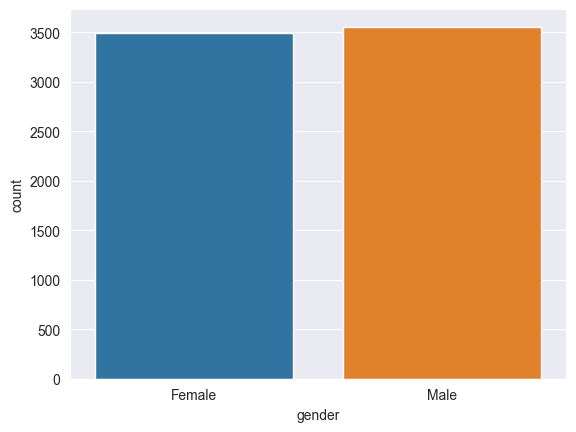

The count of Male and Female is --


,customerID
gender,
Female,3488
Male,3555


In [12]:
sns.countplot(data=data_df,x="gender")
plt.show()
print(f"The count of Male and Female is --")
data_df.groupby("gender")[["customerID"]].count()

In [13]:
pivot_table = data_df.pivot(index="customerID",columns="gender",values="MonthlyCharges")
pivot_table.columns = ["Female","Male"]
Female = pivot_table[['Female']].dropna().sort_values(by="Female")
Male = pivot_table[['Male']].dropna().sort_values(by="Male")

Text(0.5, 1.0, 'Box-plot')

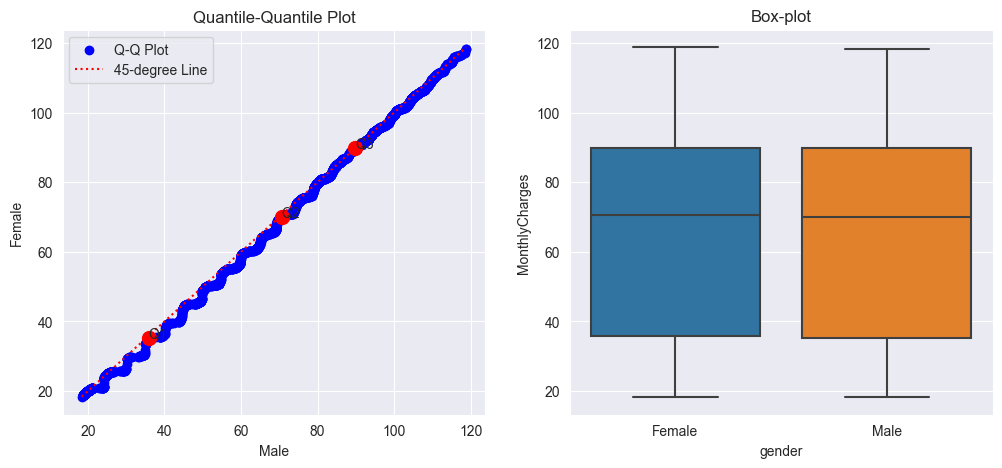

In [14]:
x = Female.Female.values
y = Male.Male.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Male","Female")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="gender",y="MonthlyCharges")
p.set_title("Box-plot")

---
**Partner**

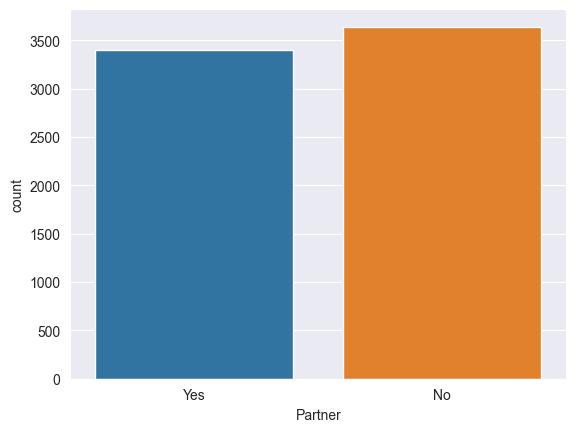

The count of Partner - Yes and Partner - No is --


,Partner,customerID
0,No,3641
1,Yes,3402


In [15]:
sns.countplot(data=data_df,x="Partner")
plt.show()
print(f"The count of Partner - Yes and Partner - No is --")
data_df.groupby("Partner")[["customerID"]].count().reset_index()

In [16]:
pivot_table = data_df.pivot(index="customerID",columns="Partner",values="MonthlyCharges")
pivot_table.columns = ["P_No","P_Yes"]
P_Yes = pivot_table[['P_Yes']].dropna().sort_values(by="P_Yes")
P_No = pivot_table[['P_No']].dropna().sort_values(by="P_No")

Text(0.5, 1.0, 'Box-plot')

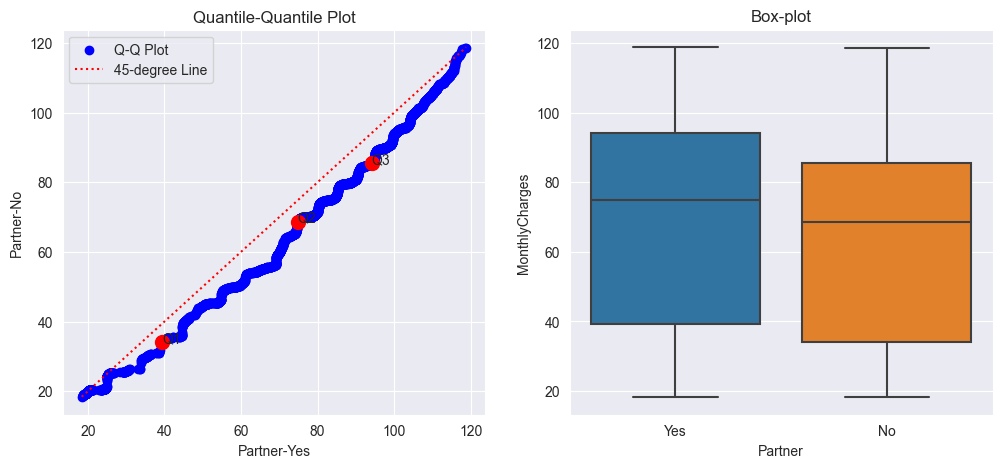

In [17]:
x = P_Yes.P_Yes.values
y = P_No.P_No.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Partner-Yes","Partner-No")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="Partner",y="MonthlyCharges")
p.set_title("Box-plot")

<Axes: xlabel='Partner', ylabel='count'>

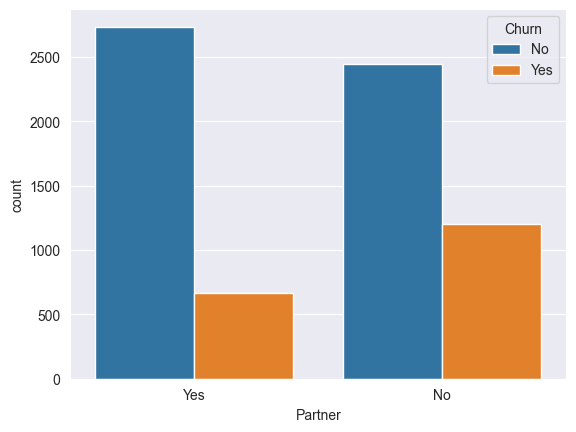

In [18]:
sns.countplot(data=data_df,x="Partner",hue="Churn")

---
**Dependents**

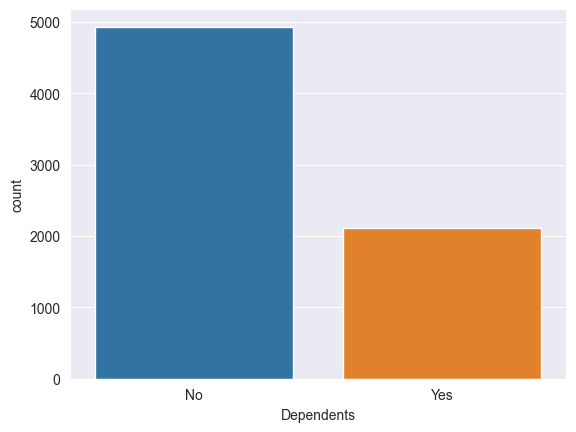

The count of PhoneService - Yes and PhoneService - No is --


,Dependents,customerID
0,No,4933
1,Yes,2110


In [19]:
sns.countplot(data=data_df,x="Dependents")
plt.show()
print(f"The count of PhoneService - Yes and PhoneService - No is --")
data_df.groupby("Dependents")[["customerID"]].count().reset_index()

In [20]:
pivot_table = data_df.pivot(index="customerID",columns="Dependents",values="MonthlyCharges")
pivot_table.columns = ["P_No","P_Yes"]
P_Yes = pivot_table[['P_Yes']].dropna().sort_values(by="P_Yes")
P_No = pivot_table[['P_No']].dropna().sort_values(by="P_No")

Text(0.5, 1.0, 'Box-plot')

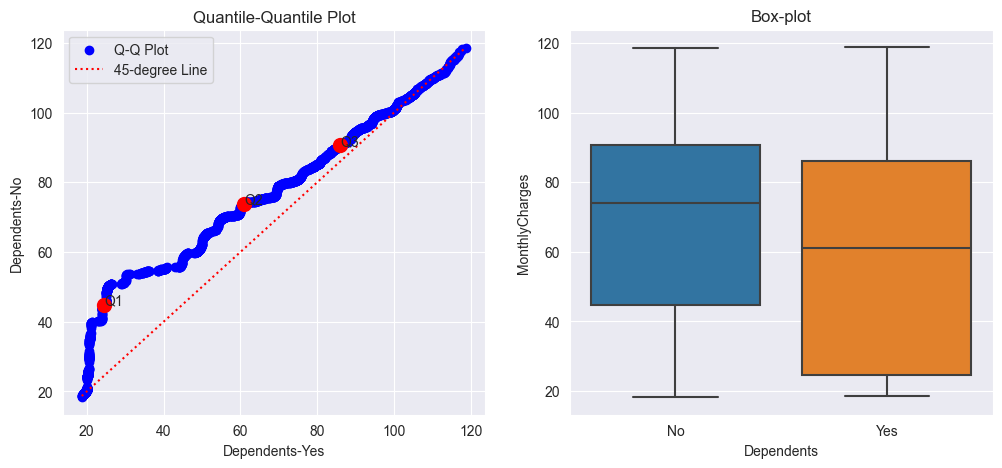

In [21]:
x = P_Yes.P_Yes.values
y = P_No.P_No.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Dependents-Yes","Dependents-No")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="Dependents",y="MonthlyCharges")
p.set_title("Box-plot")

<Axes: xlabel='Dependents', ylabel='count'>

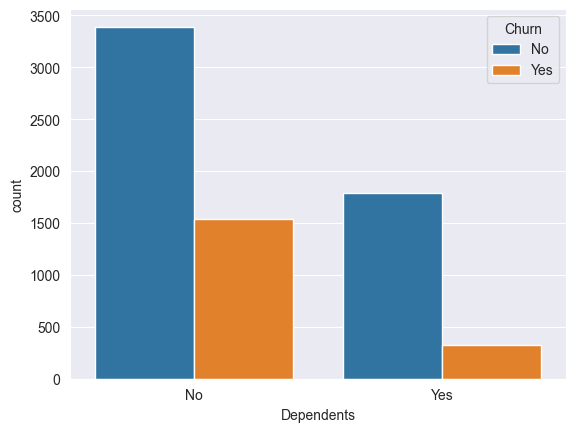

In [22]:
sns.countplot(data=data_df,x="Dependents",hue="Churn")

---
**PhoneService**

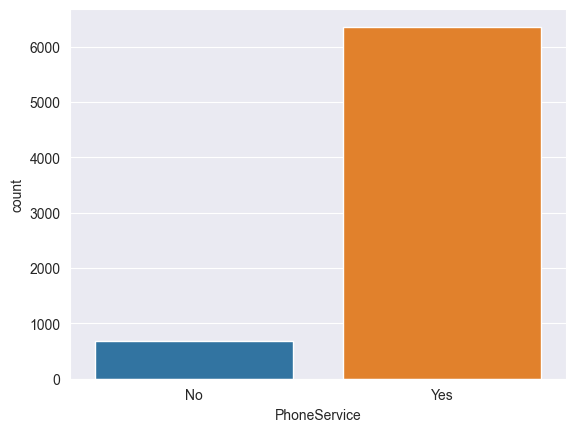

The count of PhoneService - Yes and PhoneService - No is --


,PhoneService,customerID
0,No,682
1,Yes,6361


In [23]:
sns.countplot(data=data_df,x="PhoneService")
plt.show()
print(f"The count of PhoneService - Yes and PhoneService - No is --")
data_df.groupby("PhoneService")[["customerID"]].count().reset_index()

In [24]:
pivot_table = data_df.pivot(index="customerID",columns="PhoneService",values="MonthlyCharges")
pivot_table.columns = ["P_No","P_Yes"]
P_Yes = pivot_table[['P_Yes']].dropna().sort_values(by="P_Yes")
P_No = pivot_table[['P_No']].dropna().sort_values(by="P_No")

Text(0.5, 1.0, 'Box-plot')

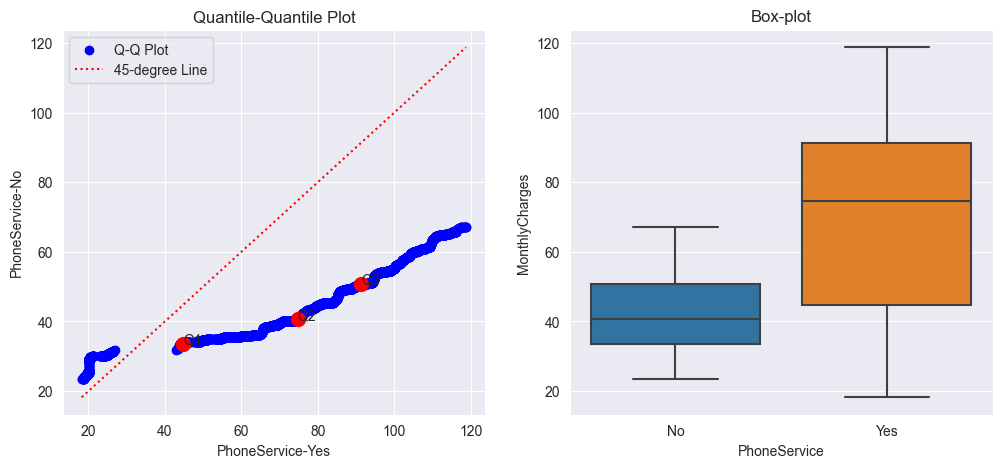

In [25]:
x = P_Yes.P_Yes.values
y = P_No.P_No.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"PhoneService-Yes","PhoneService-No")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="PhoneService",y="MonthlyCharges")
p.set_title("Box-plot")

<Axes: xlabel='PhoneService', ylabel='count'>

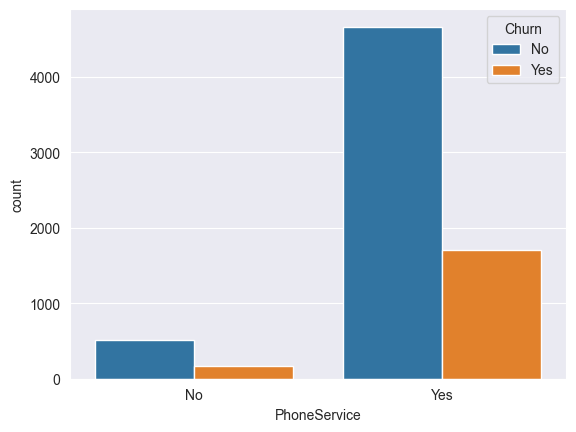

In [26]:
sns.countplot(data=data_df,x="PhoneService",hue="Churn")

---
**"MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"**

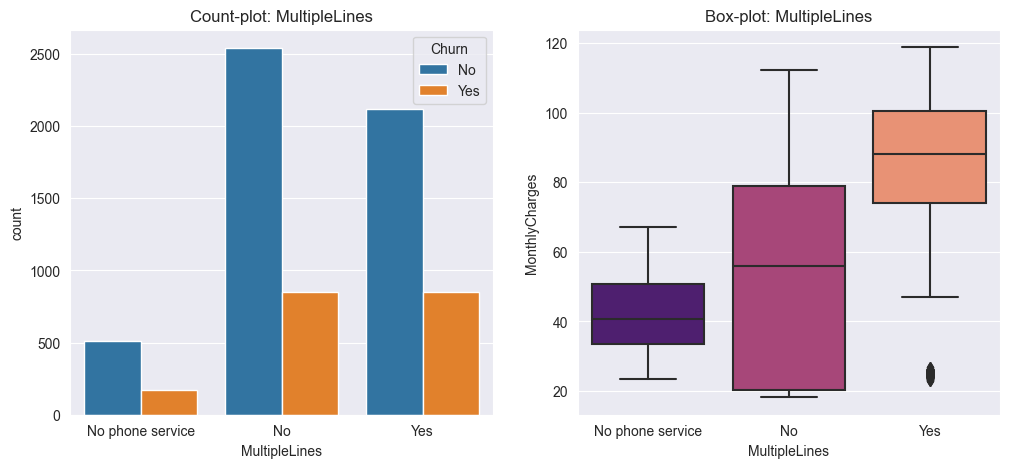

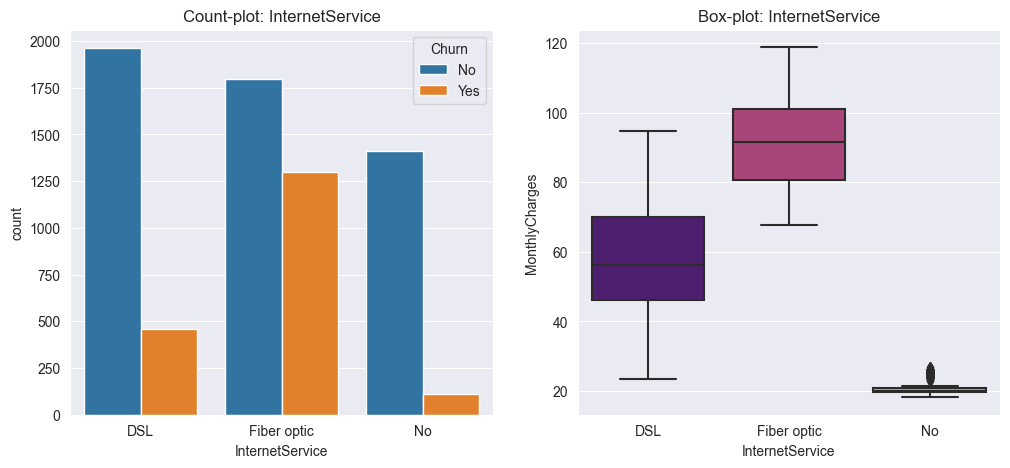

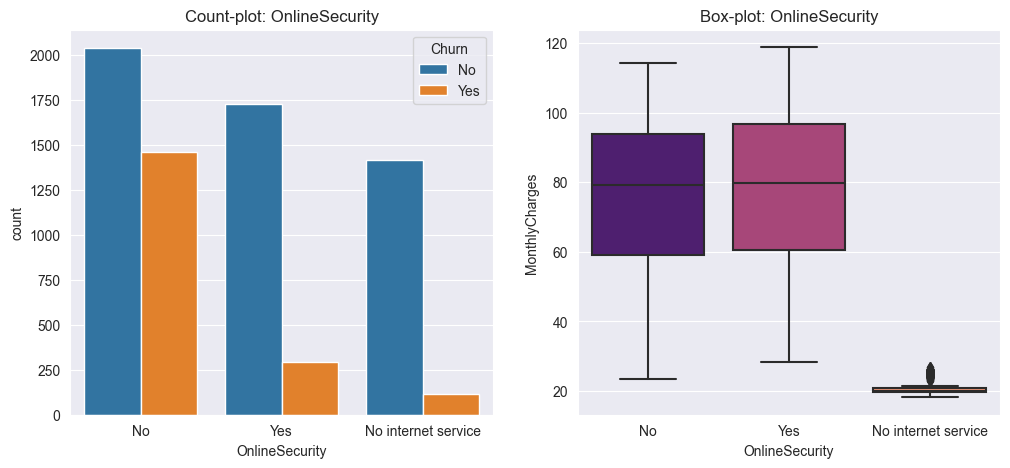

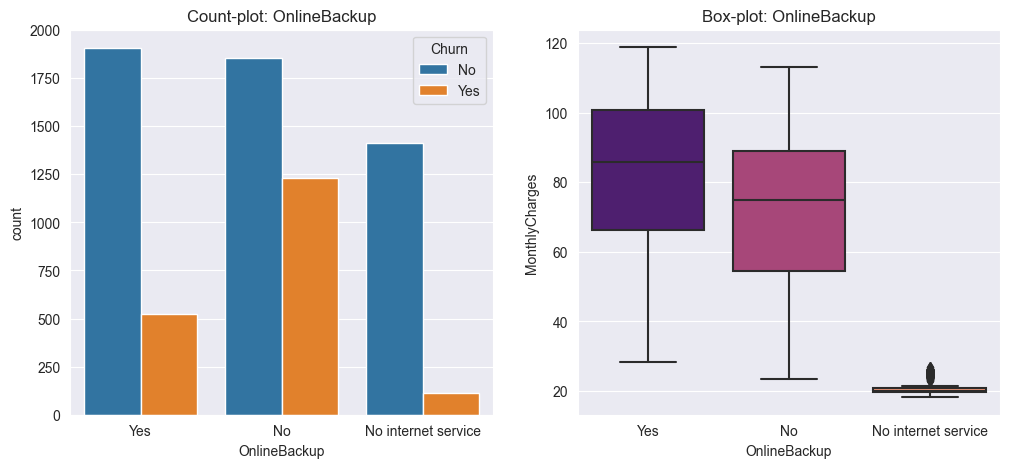

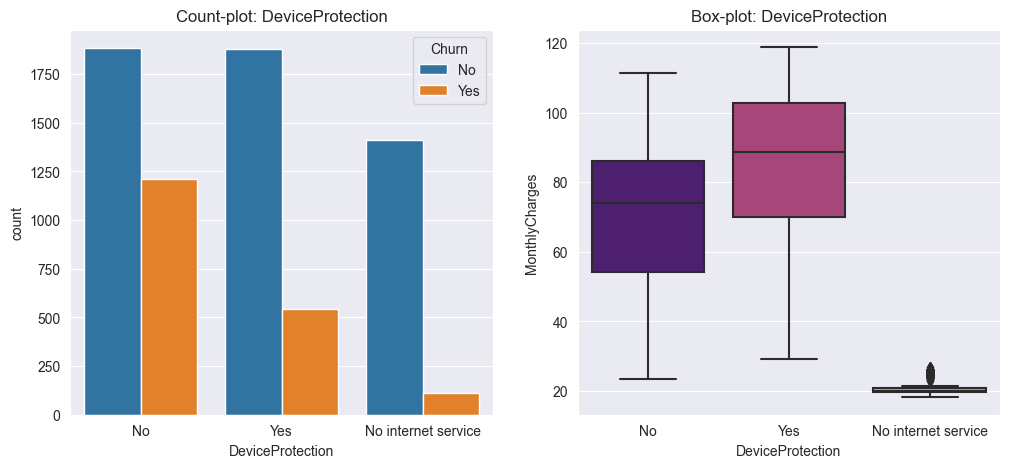

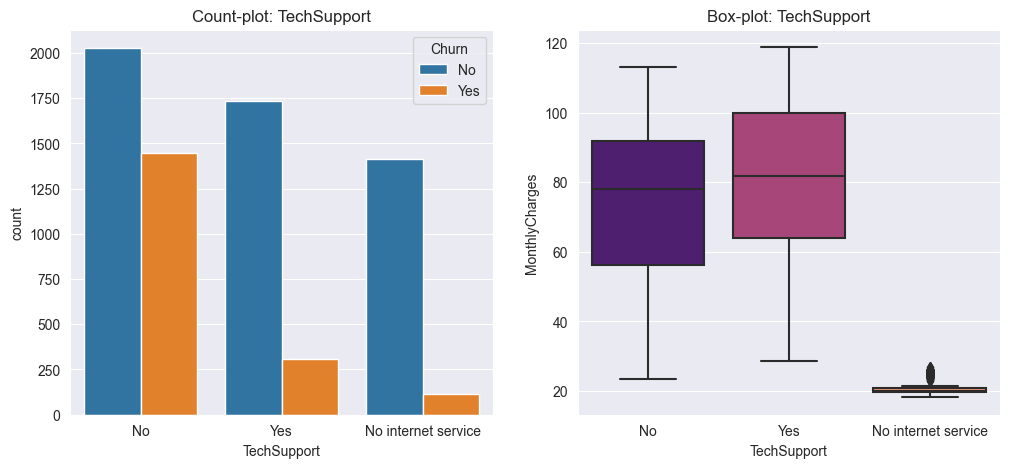

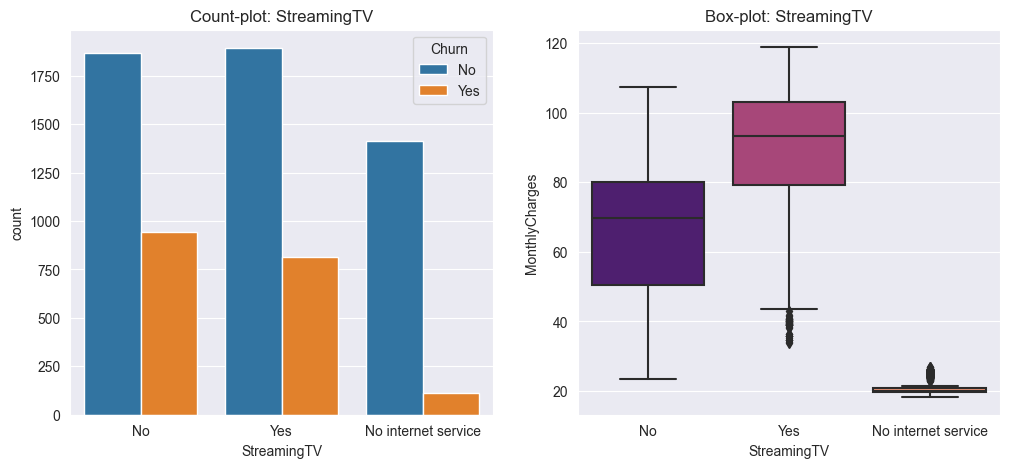

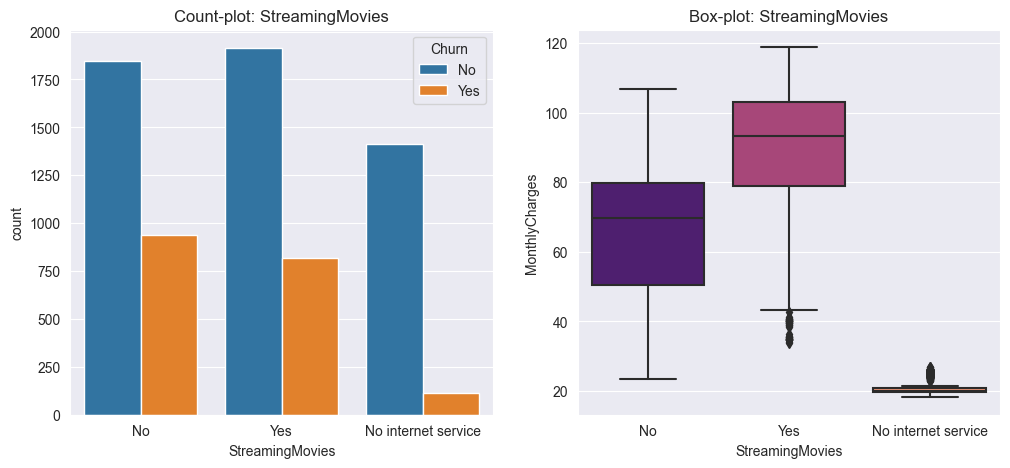

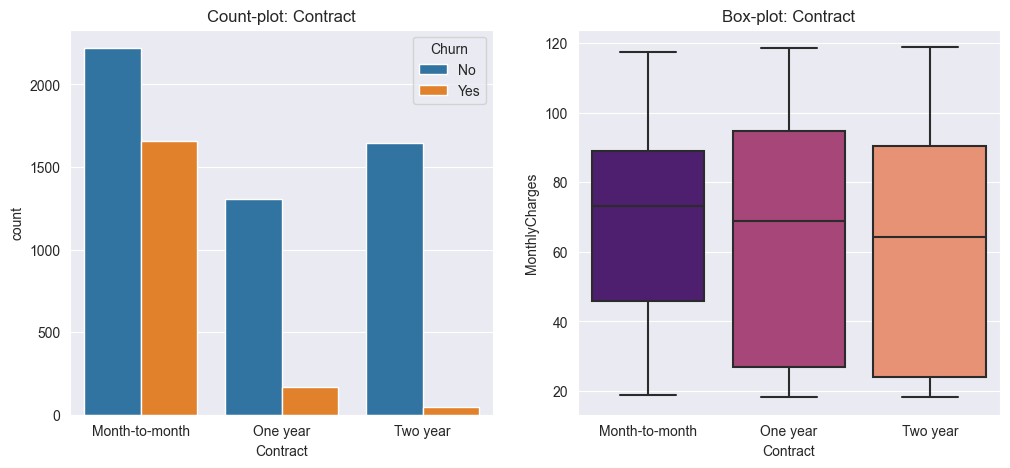

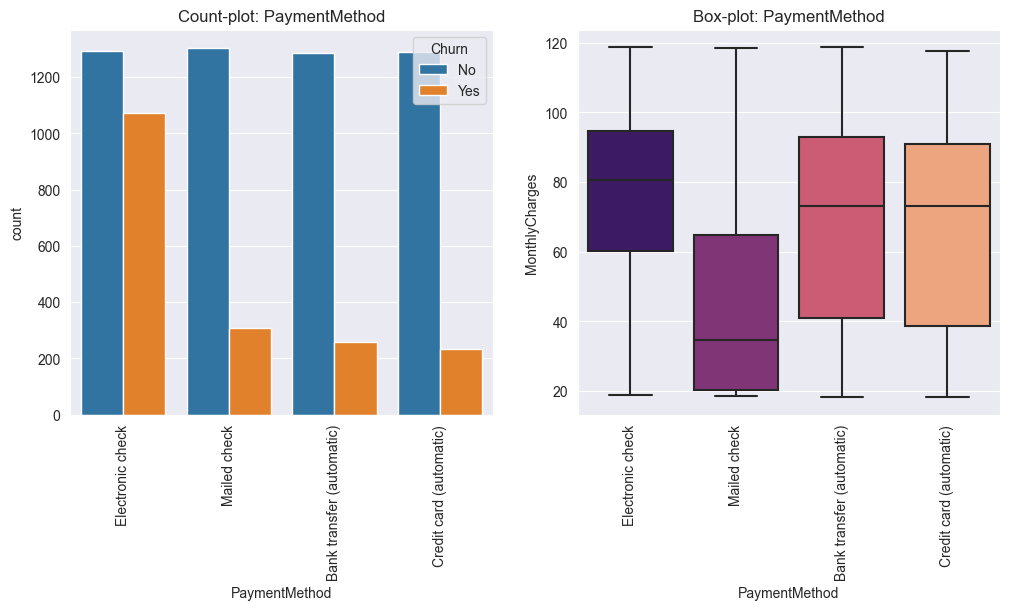

In [36]:
lst = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

for col in lst:
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    p1 = sns.countplot(data=data_df,x=col,hue="Churn")
    p1.set_title(f"Count-plot: {col}")
    if col == "PaymentMethod":
        plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    p2 = sns.boxplot(data=data_df,x=col,y="MonthlyCharges",palette="magma")
    p2.set_title(f"Box-plot: {col}")
    if col == "PaymentMethod":
        plt.xticks(rotation=90)
    plt.show()

---
**PaperlessBilling**

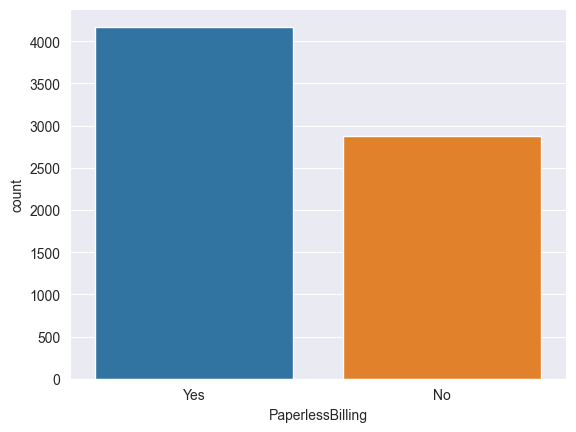

The count of PaperlessBilling - Yes and PaperlessBilling - No is --


,PaperlessBilling,customerID
0,No,2872
1,Yes,4171


In [28]:
sns.countplot(data=data_df,x="PaperlessBilling")
plt.show()
print(f"The count of PaperlessBilling - Yes and PaperlessBilling - No is --")
data_df.groupby("PaperlessBilling")[["customerID"]].count().reset_index()

Text(0.5, 1.0, 'Box-plot')

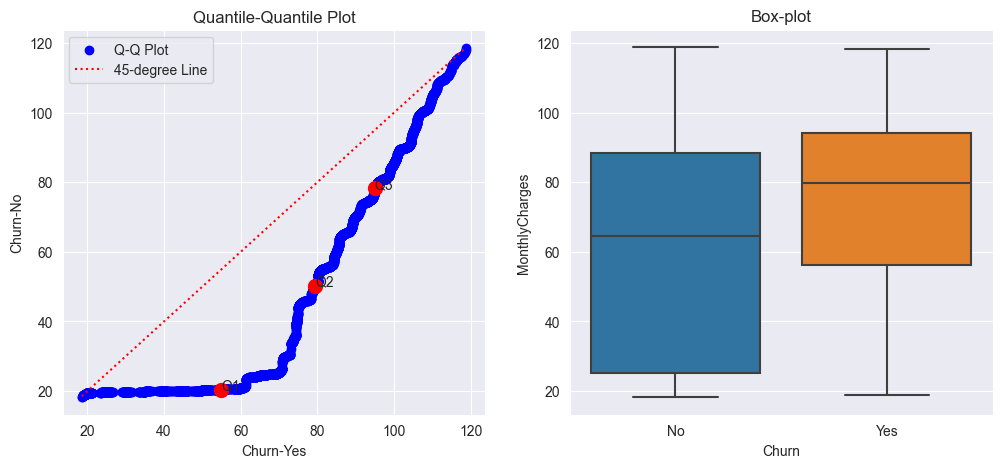

In [29]:
pivot_table = data_df.pivot(index="customerID",columns="PaperlessBilling",values="MonthlyCharges")
pivot_table.columns = ["P_No","P_Yes"]
P_Yes = pivot_table[['P_Yes']].dropna().sort_values(by="P_Yes")
P_No = pivot_table[['P_No']].dropna().sort_values(by="P_No")
x = P_Yes.P_Yes.values
y = P_No.P_No.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Churn-Yes","Churn-No")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="Churn",y="MonthlyCharges")
p.set_title("Box-plot")

<Axes: xlabel='PaperlessBilling', ylabel='count'>

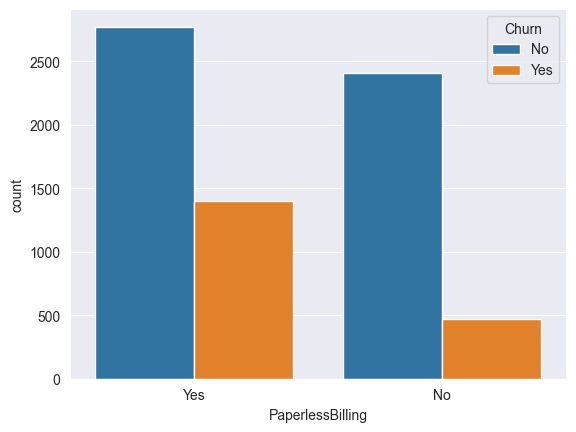

In [37]:
sns.countplot(data=data_df,x="PaperlessBilling",hue="Churn")

---
**Churn**

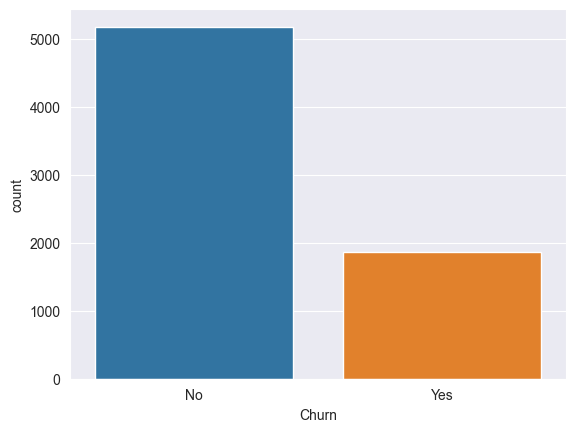

The count of Churn - Yes and Churn - No is --


,Churn,customerID
0,No,5174
1,Yes,1869


In [30]:
sns.countplot(data=data_df,x="Churn")
plt.show()
print(f"The count of Churn - Yes and Churn - No is --")
data_df.groupby("Churn")[["customerID"]].count().reset_index()

Text(0.5, 1.0, 'Box-plot')

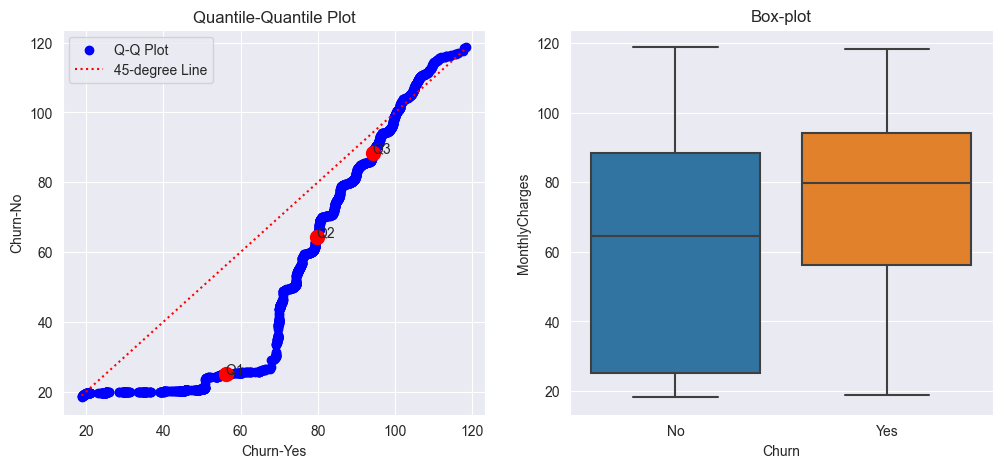

In [31]:
pivot_table = data_df.pivot(index="customerID",columns="Churn",values="MonthlyCharges")
pivot_table.columns = ["P_No","P_Yes"]
P_Yes = pivot_table[['P_Yes']].dropna().sort_values(by="P_Yes")
P_No = pivot_table[['P_No']].dropna().sort_values(by="P_No")
x = P_Yes.P_Yes.values
y = P_No.P_No.values

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
qqplot(x,y,"Churn-Yes","Churn-No")
plt.subplot(1,2,2)
p = sns.boxplot(data=data_df,x="Churn",y="MonthlyCharges")
p.set_title("Box-plot")

---
**'tenure', 'MonthlyCharges', 'TotalCharges'**

<Axes: >

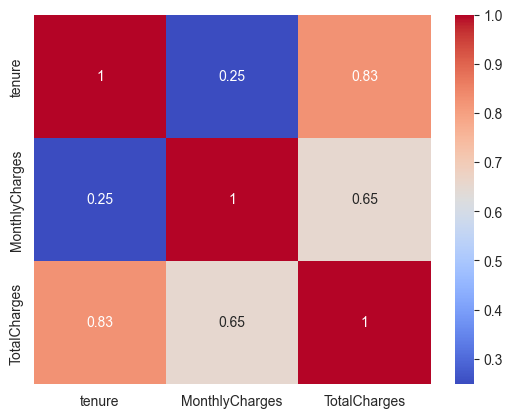

In [53]:
X = data_df[numerical].corr()
sns.heatmap(data=X,cmap="coolwarm",annot=True)

<Axes: xlabel='TotalCharges', ylabel='Count'>

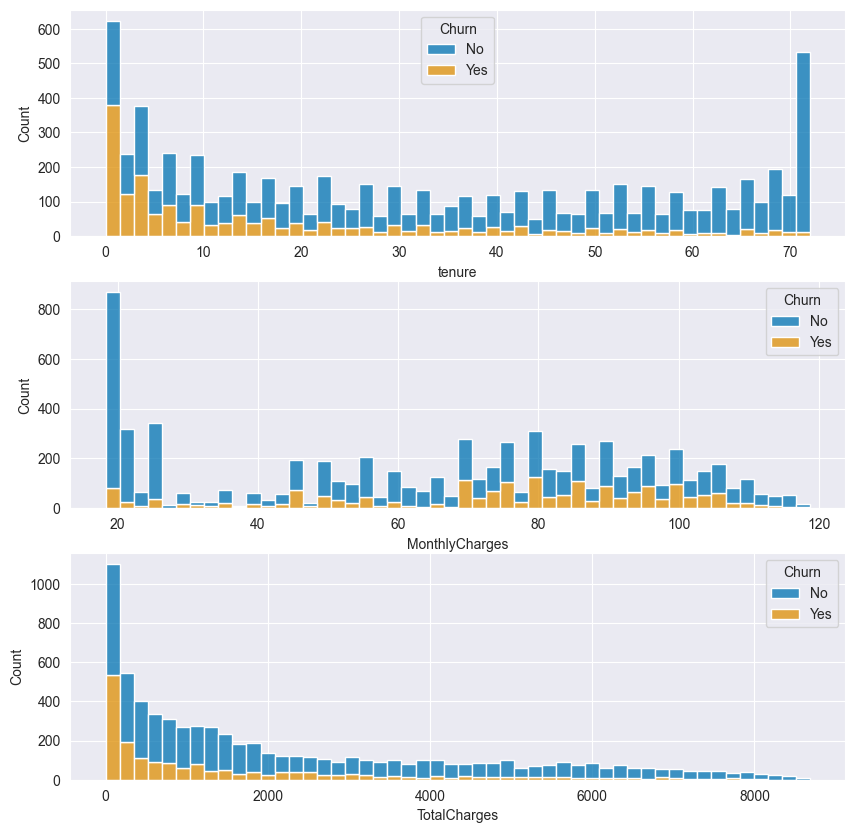

In [77]:
plt.figure(figsize=[10,10])

sns.set_palette("colorblind", n_colors=2)

plt.subplot(3,1,1)
sns.histplot(data=data_df,x="tenure",hue="Churn",bins=50,multiple="stack")
plt.subplot(3,1,2)
sns.histplot(data=data_df,x="MonthlyCharges",hue="Churn",bins=50,multiple="stack")
plt.subplot(3,1,3)
sns.histplot(data=data_df,x="TotalCharges",hue="Churn",bins=50,multiple="stack")